In [1]:
import numpy as np
import random
import xlrd
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_style('whitegrid')

In [2]:
newdata=pd.read_csv('India_dataset.csv')
newdata.head()

,Area_Name,Year,Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Person_in_Custody
0,Andaman & Nicobar Islands,2001,Rape,6,0,3.0,3,0,6,0,6,48,51,57
1,Andhra Pradesh,2001,Rape,1168,13,1150.0,1021,246,450,34,1414,2597,3618,3186
2,Arunachal Pradesh,2001,Rape,1,0,51.0,31,2,25,15,3,319,350,402
3,Assam,2001,Rape,403,14,928.0,585,120,806,190,523,2283,2868,4096
4,Bihar,2001,Rape,756,0,1400.0,1302,217,719,241,973,5634,6936,7258


In [3]:
newdata['Persons_Arrested']=newdata['Persons_Arrested'].astype(float)
newdata.head()

,Area_Name,Year,Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Person_in_Custody
0,Andaman & Nicobar Islands,2001,Rape,6,0,3.0,3,0,6,0,6,48,51,57
1,Andhra Pradesh,2001,Rape,1168,13,1150.0,1021,246,450,34,1414,2597,3618,3186
2,Arunachal Pradesh,2001,Rape,1,0,51.0,31,2,25,15,3,319,350,402
3,Assam,2001,Rape,403,14,928.0,585,120,806,190,523,2283,2868,4096
4,Bihar,2001,Rape,756,0,1400.0,1302,217,719,241,973,5634,6936,7258


In [4]:
newdata.to_csv("India_crime.csv",index=False)

Text(0.5, 1.0, 'Total Count of Arrrested people by year')

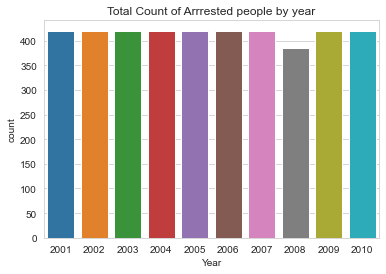

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
newdata.groupby('Year').describe
sns.countplot(data=newdata, x='Year')
plt.title('Total Count of Arrrested people by year')

In [6]:
text = []
tc = 0
for t in newdata['Group_Name']:
    text.append(t)
    tc += 1

all_text = " ".join(t for t in text)

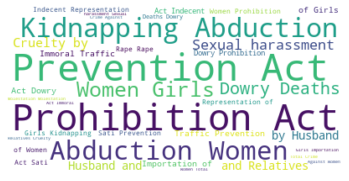

In [7]:

# create stopword list
stopwords = set(STOPWORDS)
# add words you don't want to include in wordcloud
stopwords.update(["br", "im"])

# generate a wordcloud image
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(all_text)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the generated image to a file with a proper file name
wordcloud.to_file("Picture.png")

In [8]:
sati=newdata[newdata.Group_Name=="Sati Prevention Act"]

In [9]:
dowry=newdata[newdata.Group_Name=="Dowry Deaths"]

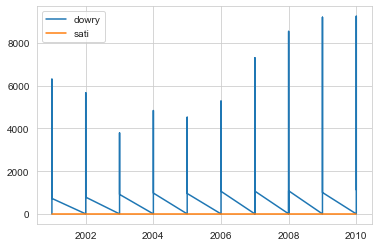

In [10]:
plt.plot(dowry.Year,dowry.Persons_Arrested)
plt.plot(sati.Year,sati.Persons_Arrested)
plt.legend(["dowry","sati"])
plt.show()

Text(0.5, 1.0, 'Bar chart of people who whose cases were withdrawn after casing files against them')

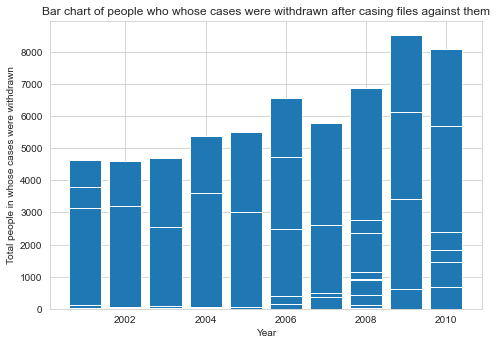

In [53]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(newdata.Year,newdata.Persons_against_whom_cases_Compounded_or_Withdrawn)
plt.ylabel("Total people in whose cases were withdrawn")
plt.xlabel("Year")
plt.title('Bar chart of people who whose cases were withdrawn after casing files against them')

In [12]:
sati.Persons_against_whom_cases_Compounded_or_Withdrawn.sum()

3

In [13]:
cruetly=newdata[newdata.Group_Name=="Cruelty by Husband and Relatives"]

In [14]:
cruetly_person_custody=cruetly.Person_in_Custody.sum()
cruetly_person_custody

5686781

In [15]:
dowry=newdata[newdata.Group_Name=="Dowry Deaths"]
dowry_custody=dowry.Person_in_Custody.sum()
dowry_custody

792501

In [16]:
sexual_harras=newdata[newdata.Group_Name=="Sexual harassment"]
sexual_custody=sexual_harras.Person_in_Custody.sum()
sexual_custody

348814

In [17]:
kidnapp=newdata[newdata.Group_Name=="Kidnapping & Abduction - Women & Girls"]
kidnapp_custody=kidnapp.Person_in_Custody.sum()
kidnapp_custody

1084708

In [18]:
rape=newdata[newdata.Group_Name=="Rape"]
rape_custody=rape.Person_in_Custody.sum()
rape_custody

1023150

In [19]:
goa = newdata[newdata.Area_Name=="Goa"]
goa_person_arrested=goa.Persons_Arrested.sum()
goa_person_arrested

2960.0

In [20]:
bihar = newdata [newdata.Area_Name=="Bihar"]
bihar_person_arrested = bihar.Persons_Arrested.sum()
bihar_person_arrested

224737.0

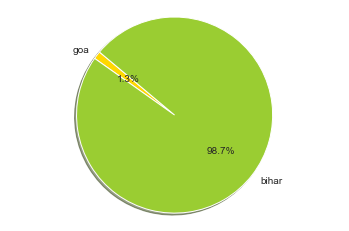

In [21]:
labels=['goa','bihar']
sizes=[goa_person_arrested,bihar_person_arrested]
colors = ['gold', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [22]:
molestation = newdata[newdata.Group_Name == "Molestation"]

In [23]:
molestation_custody=bihar.Person_in_Custody.sum()
molestation_custody

1133422

In [24]:
newdata['Group_Name'].value_counts()

Importation of Girls                                  350
Molestation                                           350
Sexual harassment                                     350
Dowry Prohibition Act                                 350
Rape                                                  350
Cruelty by Husband and Relatives                      350
Sati Prevention Act                                   350
Immoral Traffic (Prevention) Act                      350
Indecent Representation of Women (Prohibition) Act    350
Kidnapping & Abduction - Women & Girls                350
Dowry Deaths                                          350
Total Crime Against Women                             315
Name: Group_Name, dtype: int64

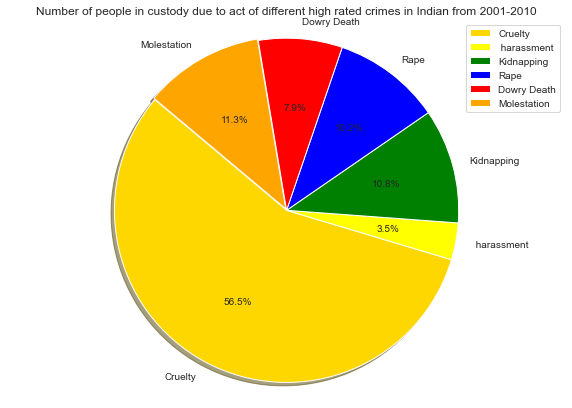

In [25]:
fig3, ax = plt.subplots(1, figsize=(10, 7))
labels=['Cruelty',' harassment','Kidnapping',
        'Rape','Dowry Death','Molestation']
sizes=[cruetly_person_custody,sexual_custody,kidnapp_custody,rape_custody,dowry_custody,molestation_custody]
colors = ['gold', 'yellow','green','blue','red','orange']
explode = (0, 0,0,0,0,0.01)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_title("Number of people in custody due to act of different high rated crimes in Indian from 2001-2010")
plt.legend()
plt.axis('equal')
plt.show()

In [26]:
fig3.savefig("Pie_chart_custody.png", dpi=100)

In [27]:
# Keeping only the required columns

state_wise_total_crimes = newdata[['Area_Name', 'Persons_Arrested', 'Year']]
data_for_map = state_wise_total_crimes[state_wise_total_crimes['Year']==2010]
data_for_map.head(500)


,Area_Name,Persons_Arrested,Year
315,Andaman & Nicobar Islands,39.0,2010
316,Andhra Pradesh,1761.0,2010
317,Arunachal Pradesh,49.0,2010
318,Assam,1629.0,2010
319,Bihar,892.0,2010
...,...,...,...
4160,Tamil Nadu,9649.0,2010
4161,Tripura,2127.0,2010
4162,Uttar Pradesh,58330.0,2010
4163,Uttarakhand,1750.0,2010


In [28]:
fp = "Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [29]:
data_for_map['Area_Name'].iloc[29]  = 'Andaman & Nicobar Island'
data_for_map['Area_Name'].iloc[1] = 'Arunanchal Pradesh'
data_for_map['Area_Name'].iloc[31] = 'Dadara & Nagar Havelli'
data_for_map['Area_Name'].iloc[33] = 'NCT of Delhi'


c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

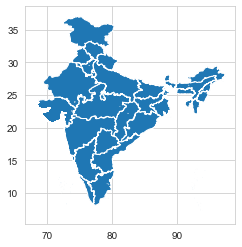

In [30]:

map_df.plot()



In [31]:
merged = map_df.set_index('st_nm').join(data_for_map.set_index('Area_Name'))
merged.head()

,geometry,Persons_Arrested,Year
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",21.0,2010.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",1722.0,2010.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",1322.0,2010.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",4622.0,2010.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",3820.0,2010.0


In [32]:
merged.isna().sum()

geometry            0
Persons_Arrested    1
Year                1
dtype: int64

In [33]:
merged.describe()

,Persons_Arrested,Year
count,372.000000,372.0
mean,1787.755376,2010.0
std,5796.259135,0.0
min,0.000000,2010.0
25%,0.000000,2010.0
50%,15.000000,2010.0
75%,685.250000,2010.0
max,58330.000000,2010.0


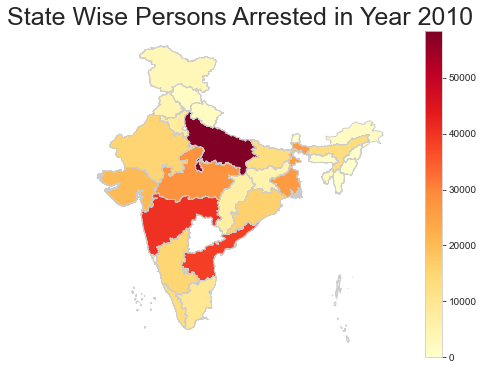

In [34]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Persons Arrested in Year 2010', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='Persons_Arrested', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [35]:
newdata['Area_Name'].value_counts()

Punjab                       119
West Bengal                  119
Nagaland                     119
Arunachal Pradesh            119
Manipur                      119
Andhra Pradesh               119
Mizoram                      119
Haryana                      119
Kerala                       119
Jharkhand                    119
Delhi                        119
Andaman & Nicobar Islands    119
Jammu & Kashmir              119
Lakshadweep                  119
Chhattisgarh                 119
Daman & Diu                  119
Chandigarh                   119
Maharashtra                  119
Meghalaya                    119
Assam                        119
Tamil Nadu                   119
Rajasthan                    119
Uttar Pradesh                119
Madhya Pradesh               119
Odisha                       119
Dadra & Nagar Haveli         119
Himachal Pradesh             119
Goa                          119
Puducherry                   119
Tripura                      119
Karnataka 

In [36]:
u=newdata[['Area_Name', 'Persons_Arrested', 'Year']]
UP = newdata[newdata.Area_Name == "Uttar Pradesh"]
data_for_map = UP[UP['Year']==2010]
data_for_map.head(10)

,Area_Name,Year,Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Person_in_Custody
347,Uttar Pradesh,2010,Rape,1218,0,2580.0,1842,1304,168,703,2522,7023,8865,6714
697,Uttar Pradesh,2010,Kidnapping & Abduction - Women & Girls,3369,25,11903.0,6831,3951,1469,4285,7320,15203,22034,18414
1047,Uttar Pradesh,2010,Dowry Deaths,2897,127,9250.0,5958,3828,1232,3267,6725,22825,28783,24420
1397,Uttar Pradesh,2010,Molestation,1137,71,4189.0,3646,2810,132,496,3947,9743,13389,9682
1747,Uttar Pradesh,2010,Sexual harassment,1095,0,15.0,36,3157,33,12,4252,10024,10060,5841
2097,Uttar Pradesh,2010,Cruelty by Husband and Relatives,10430,1162,29853.0,22468,11741,3822,7208,22171,55307,77775,62263
2447,Uttar Pradesh,2010,Importation of Girls,0,0,0.0,0,0,0,0,0,0,0,0
2797,Uttar Pradesh,2010,Immoral Traffic (Prevention) Act,1956,49,0.0,119,97,201,801,13,250,954,250
3147,Uttar Pradesh,2010,Dowry Prohibition Act,1961,631,84.0,418,357,714,2982,71,1345,4054,746
3497,Uttar Pradesh,2010,Indecent Representation of Women (Prohibition)...,1986,0,0.0,3,0,0,0,3,0,0,0


In [37]:
fig.savefig("State_wise.png", dpi=100)

## Person arrested from commiting rape crime in different states from 2001-2010

In [38]:
# Keeping only the required columns

rape_crime = newdata[['Area_Name','Group_Name', 'Persons_Arrested', 'Year']]
data_for_map_rape = rape_crime[rape_crime['Group_Name']=="Rape"]
data_for_map_rape.head(500)


,Area_Name,Group_Name,Persons_Arrested,Year
0,Andaman & Nicobar Islands,Rape,3.0,2001
1,Andhra Pradesh,Rape,1150.0,2001
2,Arunachal Pradesh,Rape,51.0,2001
3,Assam,Rape,928.0,2001
4,Bihar,Rape,1400.0,2001
...,...,...,...,...
345,Tamil Nadu,Rape,777.0,2010
346,Tripura,Rape,320.0,2010
347,Uttar Pradesh,Rape,2580.0,2010
348,Uttarakhand,Rape,171.0,2010


In [39]:
data_for_map_rape['Area_Name'].iloc[29]  = 'Andaman & Nicobar Island'
data_for_map_rape['Area_Name'].iloc[1] = 'Arunanchal Pradesh'
data_for_map_rape['Area_Name'].iloc[31] = 'Dadara & Nagar Havelli'
data_for_map_rape['Area_Name'].iloc[33] = 'NCT of Delhi'

c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ganesh\anaconda3\envs\test_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [40]:
merged2 = map_df.set_index('st_nm').join(data_for_map_rape.set_index('Area_Name'))
merged2.head()

,geometry,Group_Name,Persons_Arrested,Year
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",Rape,6.0,2001.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Rape,1340.0,2002.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Rape,1237.0,2003.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Rape,1443.0,2004.0
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",Rape,1415.0,2005.0


In [41]:
merged2.describe()

,Persons_Arrested,Year
count,310.000000,310.000000
mean,733.403226,2005.500000
std,880.759015,2.876925
min,0.000000,2001.000000
25%,41.500000,2003.000000
50%,514.000000,2005.500000
75%,1119.750000,2008.000000
max,4387.000000,2010.000000


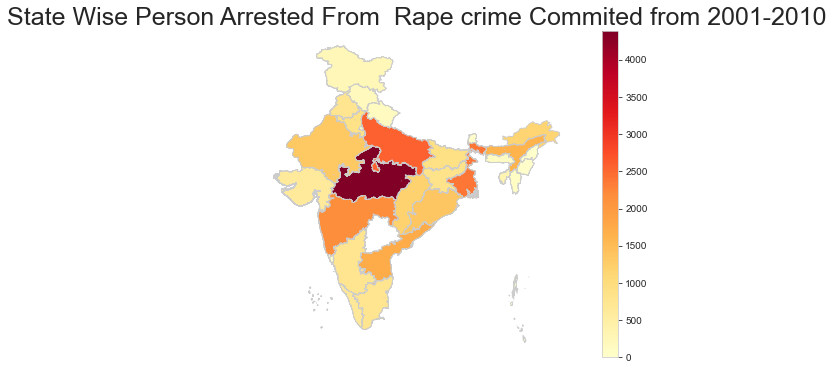

In [42]:
# create figure and axes for Matplotlib and set the title
fig2, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Person Arrested From  Rape crime Commited from 2001-2010', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged2.plot(column='Persons_Arrested', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

In [44]:
newdata.head()

,Area_Name,Year,Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Person_in_Custody
0,Andaman & Nicobar Islands,2001,Rape,6,0,3.0,3,0,6,0,6,48,51,57
1,Andhra Pradesh,2001,Rape,1168,13,1150.0,1021,246,450,34,1414,2597,3618,3186
2,Arunachal Pradesh,2001,Rape,1,0,51.0,31,2,25,15,3,319,350,402
3,Assam,2001,Rape,403,14,928.0,585,120,806,190,523,2283,2868,4096
4,Bihar,2001,Rape,756,0,1400.0,1302,217,719,241,973,5634,6936,7258


In [45]:
withdrawn=newdata.Persons_against_whom_cases_Compounded_or_Withdrawn
chargeshetted=newdata.Persons_Chargesheeted
convicted=newdata.Persons_Convicted
released=newdata.Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason
trial_completed=newdata.Persons_Trial_Completed
under_trial=newdata.Total_Persons_under_Trial
custody=newdata.Person_in_Custody


In [46]:
arressted=newdata.Persons_Arrested
accuqitted=newdata.Persons_Acquitted

In [47]:
df=pd.DataFrame({'arressted':arressted,'accquitted':accuqitted,'withdrawn':withdrawn,'chargeshetted':chargeshetted,'convicted':convicted,'released':released,'trial_completed':trial_completed,'under_trial':under_trial,'custody':custody},index=newdata.Year)
line_data=[arressted,accuqitted,withdrawn,chargeshetted,convicted,released,trial_completed,under_trial,custody]

<Figure size 1440x216 with 0 Axes>

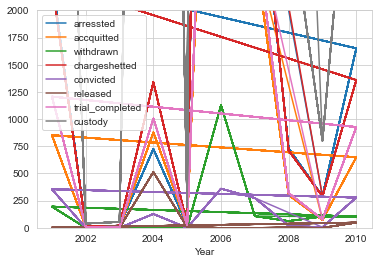

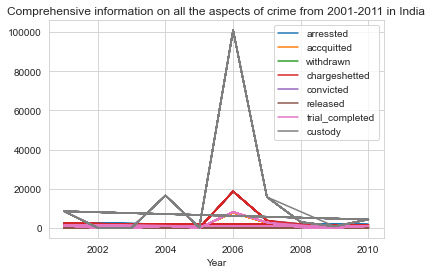

In [48]:
plt.figure(figsize=(20, 3))
ax=df.plot()
ax.set_ylim(0,2000)
df.plot.line(title="Comprehensive information on all the aspects of crime from 2001-2011 in India")
plt.savefig("line_graph.png")

numpy.ndarray

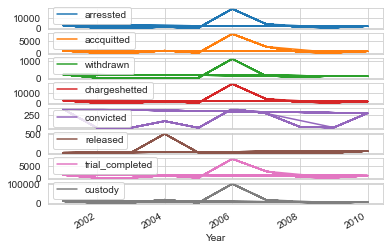

In [49]:
axes = df.plot.line(subplots=True)
type(axes)

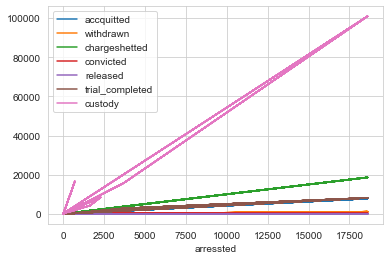

In [50]:
lines = df.plot.line(x='arressted')

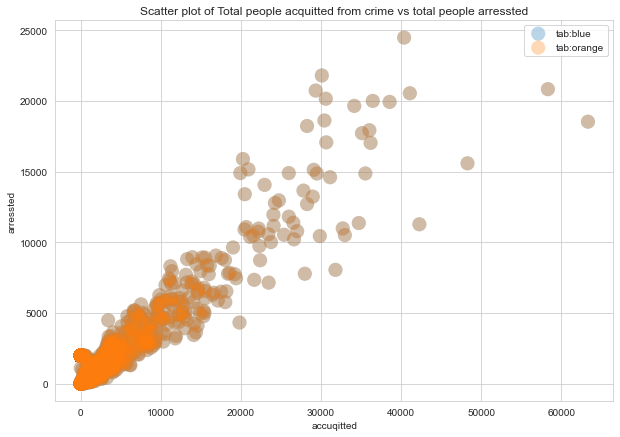

In [51]:
fig4, ax = plt.subplots(1, figsize=(10, 7))
from matplotlib.colors import ListedColormap
X_set, y_set = [arressted, accuqitted]
for color in ['tab:blue', 'tab:orange']:
    scale =200
    x,y= arressted,accuqitted
    plt.scatter(x, y,c=color, label=color,s=scale,
               alpha=0.3, edgecolors='none')
plt.title('Scatter plot of Total people acquitted from crime vs total people arressted')
plt.xlabel('accuqitted')
plt.ylabel('arressted')
plt.legend()
ax.grid(True)
plt.show()

In [52]:
fig4.savefig("Scatter plot.png")